In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 1. Two Sum  

Given an array of integers, return indices of the two numbers such that they add up to a specific target.  
You may assume that each input would have exactly one solution, and you may not use the same element twice. 
Example:    
Given nums = [2, 7, 11, 15], target = 9,  
Because nums[0] + nums[1] = 2 + 7 = 9,  
return [0, 1].

**Solution1— two for loop**

In [6]:
def twoSum(nums, target):
    for i in range(len(nums)):
        for j in range(i+1,len(nums)):
            if nums[i]+nums[j]==target:
                return i,j

**Solution2— dict() store (target-val) and index**

In [55]:
def twoSum2(nums, target):
    d = dict()
    for i,num in enumerate(nums):
        if num in d:
            return [d[num],i]
        else:
            d[target-num] = i

In [ ]:
nums = [2, 7, 11, 15]
target = 9
twoSum2(nums, target)

# 7. Reverse Integer

Given a 32-bit signed integer, reverse digits of an integer.

Example 1:  
Input: 123  
Output: 321

Example 2:  
Input: -123  
Output: -321  

Example 3:  
Input: 120  
Output: 21  

Note:  
Assume we are dealing with an environment which could only store integers within the 32-bit signed integer range: [−2^31,  2^31 − 1]. For the purpose of this problem, assume that your function returns 0 when the reversed integer overflows.

In [81]:
def reverse(x: int) -> int:
    x = int(str(x)[::-1]) if x >= 0 else - int(str(-x)[::-1])
    return x if x < 2**31 and x >= -2**31 else 0

In [83]:
x = -123
reverse(x)

-321

# 8. String to Integer (atoi)

Implement atoi which converts a string to an integer.

The function first discards as many whitespace characters as necessary until the first non-whitespace character is found. Then, starting from this character, takes an optional initial plus or minus sign followed by as many numerical digits as possible, and interprets them as a numerical value.

The string can contain additional characters after those that form the integral number, which are ignored and have no effect on the behavior of this function.

If the first sequence of non-whitespace characters in str is not a valid integral number, or if no such sequence exists because either str is empty or it contains only whitespace characters, no conversion is performed.

If no valid conversion could be performed, a zero value is returned.

Note:  
Only the space character ' ' is considered as whitespace character.
Assume we are dealing with an environment which could only store integers within the 32-bit signed integer range: [−231,  231 − 1]. If the numerical value is out of the range of representable values, INT_MAX (231 − 1) or INT_MIN (−231) is returned.

Example 1:  
Input: "42"  
Output: 42  

Example 2:  
Input: "   -42"  
Output: -42  
Explanation: The first non-whitespace character is '-', which is the minus sign.Then take as many numerical digits as possible, which gets 42.

Example 3:  
Input: "4193 with words"  
Output: 4193  
Explanation: Conversion stops at digit '3' as the next character is not a numerical digit.

Example 4:   
Input: "words and 987"  
Output: 0  
Explanation: The first non-whitespace character is 'w', which is not a numerical digit or a +/- sign. Therefore no valid conversion could be performed.

Example 5:  
Input: "-91283472332"  
Output: -2147483648  
Explanation: The number "-91283472332" is out of the range of a 32-bit signed integer.Thefore INT_MIN (−231) is returned.

### Idea

1. str.strip([chars])
strip():Remove the specified characters at the beginning and end of the string (defaults to spaces or newlines) or character sequences
- starting with space " "
    - 1st non-sapce : num/ +/- √
    - 1st non-sapce : not num/ +/-, return 0
    
2. re.match(pattern, string, flags=0)
re.match 尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，match()就返回none。

In [96]:
def myAtoi(str: str) -> int:
    import re
    stripS = str.strip() #bye space!
    
    if stripS == "" or stripS == "-" or stripS == "+":
        return 0
    s1 = re.match('[^\d]+',(stripS.lstrip("-")).lstrip("+"))
    
    if s1 != None:
        return 0
    else:
        s1 = re.search('\-*\*+\d+',stripS).group()
        
    if s1[0:2] == "--" or s1[0:2] == "-+" or s1[0:2] == "++":
        return 0
    
    result = int(s1)
    if result > 0:
        return 2147483647 if result > 2147483647 else result
    else:
        return -2147483648 if result < -2147483648 else result

In [101]:
def myAtoi(str: str) -> int:
    str = str.lstrip() # 用于截掉字符串左边的空格或指定字符
    if str == '':      # 空string，返回None
        return 0
    flag = None       
    
    if str[0] == '+':  #flag 1：+
        flag = 1
        str = str[1:]
    elif str[0] == '-':#flag 0：-
        flag = 0
        str = str[1:]
        
    list = []
    for c in str:
        try:
            if int(c) != 0 or list != []: #filter num, 如果是字母或其他不是数字，break
                list.append(c)
            if len(list) > 10:
                break
        except:
            break
    if list == []:
        return 0
    num = int(''.join(list))
    num = (0 - num) if flag == 0 else num
    return min(max(-2147483648, num), 2147483647)

In [102]:
str =  "4193 with words"
myAtoi(str)
str = "words and 987"
myAtoi(str)
str = "-91283472332"  
myAtoi(str)

4193

0

-2147483648

# 9. Palindrome Number

Determine whether an integer is a palindrome. An integer is a palindrome when it reads the same backward as forward.

Example 1:  
Input: 121  
Output: true

Example 2:  
Input: -121    
Output: false   
Explanation: From left to right, it reads -121. From right to left, it becomes 121-. Therefore it is not a palindrome.

Example 3:  
Input: 10   
Output: false  
Explanation: Reads 01 from right to left. Therefore it is not a palindrome.

Follow up:  
Coud you solve it without converting the integer to a string?

In [15]:
def isPalindrome(x) -> bool:
    if x < 0:
        return False
    return int(str(x)[::-1]) == x

x = 121
isPalindrome(121)

True

# 11. Container With Most Water

Given n non-negative integers a1, a2, ..., an , where each represents a point at coordinate (i, ai). n vertical lines are drawn such that the two endpoints of line i is at (i, ai) and (i, 0). Find two lines, which together with x-axis forms a container, such that the container contains the most water.

Note: You may not slant the container and n is at least 2.

Example:  
Input: [1,8,6,2,5,4,8,3,7]  
Output: 49

In [156]:
# Time Limit Exceeded
def maxArea(height) -> int:
    max_area = 0
    for i in range(len(height)):
        for j in range(i+1,len(height)):
            area = abs(j-i)*(min(height[i],height[j]))
            max_area = max(area,max_area)
    return max_area

In [160]:
def maxArea2(height) -> int:
    left,right = 0,len(height)-1
    result = 0
    while left < right:
        water = min(height[left],height[right])*(right-left)
        if water > result:
            result = water
        if height[left] < height[right]:
            left += 1
        else:
            right -= 1
    return result

In [161]:
height = [1,8,6,2,5,4,8,3,7]
maxArea(height)

49

# 13. Roman to Integer

Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.
    
Symbol       Value
I             1
V             5
X             10
L             50
C             100
D             500
M             1000
For example, two is written as II in Roman numeral, just two one's added together. Twelve is written as, XII, which is simply X + II. The number twenty seven is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

I can be placed before V (5) and X (10) to make 4 and 9.   
X can be placed before L (50) and C (100) to make 40 and 90.   
C can be placed before D (500) and M (1000) to make 400 and 900.  
Given a roman numeral, convert it to an integer. Input is guaranteed to be within the range from 1 to 3999.  

Example 1:  
Input: "III"  
Output: 3
    
Example 2:  
Input: "IV"  
Output: 4  
    
Example 3:  
Input: "IX"  
Output: 9  
    
Example 4:  
Input: "LVIII"  
Output: 58  
Explanation: L = 50, V= 5, III = 3.  
    
Example 5:  
Input: "MCMXCIV"  
Output: 1994  
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.

In [34]:
def romanToInt(s) -> int:
    res = 0
    d = {"I":1,"V":5,"X":10,"L":50,"C":100,"D":500,"M":1000}    
    for i in range(len(s)-1):
        if d[s[i]]<d[s[i+1]]: #if small value stands before big val,"-", else "+"
            res -= d[s[i]]
        else:
            res += d[s[i]]
    return res + d[s[-1]]    #just plus the val of last letter, i only figure out this way to deal with loop out of range

s1 = "III" 
s2 = "IV"
s3 = "IX"
s4 = "LVIII"
s5 = "MCMXCIV"

romanToInt(s5)

1994

# 14. Longest Common Prefix

Write a function to find the longest common prefix string amongst an array of strings.  
If there is no common prefix, return an empty string "".  

Example 1:  
Input: ["flower","flow","flight"]  
Output: "fl"

Example 2:   
Input: ["dog","racecar","car"]  
Output: ""   
Explanation: There is no common prefix among the input strings.  
Note: All given inputs are in lowercase letters a-z.

In [41]:
def longestCommonPrefix(strs) -> str:
    if len(strs) == 0: return ''
    for l in range(len(strs[0])): #traversal every letter of first str 
        c = strs[0][l]
        for i in range(1,len(strs)): #traversal other strs, make comparison
            if l >= len(strs[i]) or c != strs[i][l]:                 
                return strs[0][:l]
    return strs[0] #e.g. ["",""]

In [46]:
strs = ["flower","flow","flight"]
strs2 = ["dog","racecar","car"]
longestCommonPrefix(strs)
longestCommonPrefix(strs2)

fl



# 15. 3Sum -- Medium

Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0?   
Find all unique triplets in the array which gives the sum of zero.

Note:  The solution set must not contain duplicate triplets.

Example:  
Given array nums = [-1, 0, 1, 2, -1, -4],  
A solution set is:    
[[-1, 0, 1],  
 [-1, -1, 2]]

## idea 
- sort()
- for loop i
    - sum of 3 smallest nums > 0 --> break
    - nums[i] + 2 biggest nums < 0 --> get rid of very first num --> continue, right shift
    - repeat nums --> continue
    - fix i
        - while loop: approach from both sides l,r

In [36]:
def threeSum(nums):
    n = len(nums)
    result = []
    nums.sort()

    for i in range(n-2):
        if nums[i] + nums[i+1] + nums[i+2] > 0: 
            break
        if nums[i] + nums[n-2] + nums[n-1] < 0:
            continue
        if 0 < i and nums[i] == nums[i-1]:
            continue
            
        l,r = i+1,n-1 #boundary
        
        while l < r:
            tmp = nums[i] + nums[l] + nums[r]
            if tmp == 0:
                result.append([nums[i],nums[l],nums[r]])
                while l+1 < r and nums[l] == nums[l+1]:
                    l += 1
                l += 1
                while l < r-1 and nums[r] == nums[r-1]:
                    r -= 1
                r -= 1
            elif tmp < 0:
                l += 1 
            else:
                r -= 1
    return result

In [39]:
nums = [-1, 0, 1, 2, -1, -4]
nums.sort()
nums
threeSum(nums)

[-4, -1, -1, 0, 1, 2]

[[-1, -1, 2], [-1, 0, 1]]

# 16. 3Sum Closest

Given an array nums of n integers and an integer target, find three integers in nums such that the sum is closest to target. Return the sum of the three integers. You may assume that each input would have exactly one solution.

Example:  
Given array nums = [-1, 2, 1, -4], and target = 1.  
The sum that is closest to the target is 2. (-1 + 2 + 1 = 2).

## Idea
- sort()
- initialization
- for loop, approach from 2 sides, [i,l,r]
- avoid repeating

In [43]:
def threeSumClosest(nums,target: int) -> int:
    nums.sort()
    result = nums[0]+nums[1]+nums[len(nums)-1]
    for i in range(len(nums)-2):
        if i > 0 and nums[i]==nums[i-1]:
            continue
        l = i + 1
        r = len(nums) - 1
        while l < r:
            val = nums[i]+nums[l]+nums[r] 
            if abs(val - target) < abs(result-target):
                result = val
            if val == target:
                return target
            elif val < target:
                l += 1
            else:
                r -= 1
    return result

In [49]:
nums = [-1, 2, 1, -4]
target = 1
threeSumClosest(nums,target)

2

# 20. Valid Parentheses -- stack FIFO apply to offset  and matching

Given a string containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.  
An input string is valid if:  
Open brackets must be closed by the same type of brackets.  
Open brackets must be closed in the correct order.   
Note that an empty string is also considered valid.  
  
Example 1:  
Input: "()"  
Output: true  
    
Example 2:  
Input: "()[]{}"  
Output: true  
    
Example 3:  
Input: "(]"  
Output: false  
    
Example 4:  
Input: "([)]"  
Output: false  
    
Example 5: 
Input: "{[]}"  
Output: true  

In [98]:
def isValid(s) -> bool:
    if len(s) == 0: # case1: empty string is valid
        return True
    d = {")": "(", "}": "{", "]": "["}
    stack = [None]
    for i in s:
        if i in d and d[i] == stack[-1]: #如果是反括号，前括号刚好在stack的栈顶，pop()。后出现的，需要先消掉，解决顺序问题。
            stack.pop()
        else: 
            stack.append(i)
    return len(stack)==1

In [99]:
s =  "()[]{}"
isValid(s)

True

# 21. Merge Two Sorted Lists -- Linked List -- Recursion

Merge two sorted linked lists and return it as a new list. The new list should be made by splicing together the nodes of the first two lists.

Example:  
Input: 1->2->4, 1->3->4  
Output: 1->1->2->3->4->4  

In [46]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
def mergeTwoLists(self,l1,l2):
    if not l1:
        return l2
    if not l2:
        return l1
    if l1.val < l2.val: #based on smaller first num of 2 linked list, recursion,comparison, insert smaller num one by one
        l1.next = self.mergeTwoLists(l1.next,l2)
        return l1
    else:
        l2.next = self.mergeTwoLists(l1,l2.next)
    return l2

# 22. Generate Parentheses
Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.  
For example, given n = 3, a solution set is:  
[
  "((()))",  
  "(()())",  
  "(())()",  
  "()(())",  
  "()()()" ]
  
### idea - recursion
- len("(") >len(")")  + "(" or ")"
- len("(") = len(")") + "("

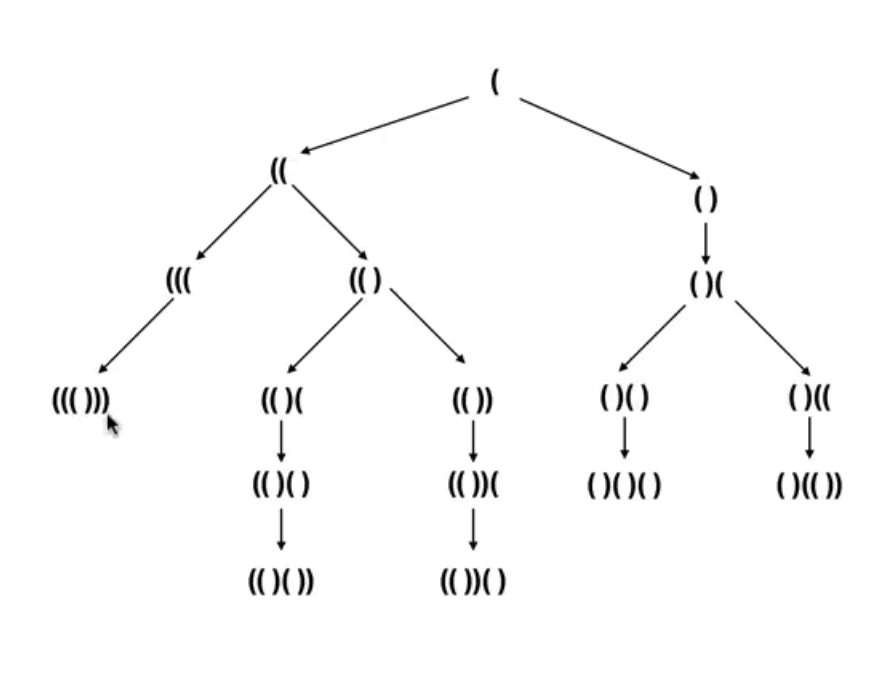

In [108]:
from IPython.display import Image
Image(filename = '22.png', width=400, height=500)

In [ ]:
def generateParenthesis(self,n):
    if n == 0:
        return []
    
    result = []
    self.helper(n,n.'',result)
    return result

def helper(self,l,r,item,result):
    if r < l:                    #left_) < left_(  -->>  cur_) < cur_( , not satisfiy, not append
        return
    if l == 0 and r == 0:       # no left Parenthesis, append
        result.append(item)
    if l > 0:                   # ( left
        self.helper(l-1,r,item+'(',result)
    if r > 0:                   # ) left
        self.helper(l,r-1,item+')',result)

# 26. Remove Duplicates from Sorted Array - Easy - Array

Given a sorted array nums, remove the duplicates in-place such that each element appear only once and return the new length.

Do not allocate extra space for another array, you must do this by modifying the input array in-place with O(1) extra memory.

Example 1:  
Given nums = [1,1,2],  
Your function should return length = 2, with the first two elements of nums being 1 and 2 respectively.  
It doesn't matter what you leave beyond the returned length.

Example 2:  
Given nums = [0,0,1,1,1,2,2,3,3,4],  
Your function should return length = 5, with the first five elements of nums being modified to 0, 1, 2, 3, and 4 respectively.  
It doesn't matter what values are set beyond the returned length.

Clarification:  
Confused why the returned value is an integer but your answer is an array?  
Note that the input array is passed in by reference, which means modification to the input array will be known to the caller as well.  

Internally you can think of this:
// nums is passed in by reference. (i.e., without making a copy)  
int len = removeDuplicates(nums);   
// any modification to nums in your function would be known by the caller.  
// using the length returned by your function, it prints the first len elements.  
for (int i = 0; i < len; i++) {  
    print(nums[i]);  
}  

In [17]:
def removeDuplicates(nums) -> int:
    nums[:]=sorted(list(set(nums)))

In [14]:
def removeDuplicates(nums) -> int:
    if not nums:
        return 0
    count = 0
    for i in range(len(nums)):
        if nums[count] != nums[i]:
            count += 1
            nums[count] = nums[i]
    return count+1  

In [19]:
nums = [0,0,1,1,1,2,2,3,3,4]
removeDuplicates(nums)

None


# 27. Remove Element

Given an array nums and a value val, remove all instances of that value in-place and return the new length.

Do not allocate extra space for another array, you must do this by modifying the input array in-place with O(1) extra memory.

The order of elements can be changed. It doesn't matter what you leave beyond the new length.

Example 1:  
Given nums = [3,2,2,3], val = 3,  
Your function should return length = 2, with the first two elements of nums being 2.  
It doesn't matter what you leave beyond the returned length.

Example 2:  
Given nums = [0,1,2,2,3,0,4,2], val = 2,  
Your function should return length = 5, with the first five elements of nums containing 0, 1, 3, 0, and 4.

In [21]:
def removeElement(nums, val: int) -> int:
    i,last = 0, len(nums)-1
    while i <= last:
        if nums[i] == val:
            nums[i],nums[last] = nums[last],nums[i]
            last -= 1
        else:
            i += 1
    return last + 1

'''
e.g. nums = [3,2,2,3],val=3, i=0, last=3
round 1: nums[0]==val,swap [3,2,2,3] last-1=2
round 2: nums[0]==val,swap [2,2,3,3] last-1=1
round 3: nums[0]!=val,     [2,2,3,3] i+1=1
round 4: nums[1]!=val,     [2,2,3,3] i+1=2, break while loop
round 5: return last+1
'''

# 28. Implement strStr()

Implement strStr().  
Return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.

Example 1:  
Input: haystack = "hello", needle = "ll"  
Output: 2

Example 2:  
Input: haystack = "aaaaa", needle = "bba"  
Output: -1  

Clarification:  
What should we return when needle is an empty string? This is a great question to ask during an interview.  
For the purpose of this problem, we will return 0 when needle is an empty string. This is consistent to C's strstr() and Java's indexOf().

### my solution

In [110]:
def strStr(haystack: str, needle: str) -> int:
    if not needle:
        return 0

    for i in range(len(haystack)-len(needle)+1):  # !!!!
        if haystack[i] == needle[0]: # or straight forward, remove this condition
            if haystack[i:i+len(needle)] == needle:
                return i 
    return -1

In [112]:
haystack = "hello"
needle = "ll"
strStr(haystack,needle)
haystack = "aaaaa" 
needle = "bba"
strStr(haystack,needle)

2

-1

# 35. Search Insert Position -- Take advantage of what we know -- sorted array

Given a sorted array and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.

You may assume no duplicates in the array.

Example 1:  
Input: [1,3,5,6], 5  
Output: 2

Example 2:  
Input: [1,3,5,6], 2  
Output: 1  

Example 3:  
Input: [1,3,5,6], 7  
Output: 4  

Example 4:  
Input: [1,3,5,6], 0  
Output: 0

In [48]:
 def searchInsert(nums, target) -> int:
        if target > nums[-1]:
            return len(nums)

        for i in range(len(nums)):
            if nums[i] >= target:
                return i

In [49]:
nums = [1,3]
target = 2
searchInsert(nums,target)

1

# 38. Count and Say
The count-and-say sequence is the sequence of integers with the first five terms as following:  

1.     1  
2.     11  
3.     21  
4.     1211  
5.     111221  
1 is read off as "one 1" or 11.  
11 is read off as "two 1s" or 21.  
21 is read off as "one 2, then one 1" or 1211.  

Given an integer n where 1 ≤ n ≤ 30, generate the nth term of the count-and-say sequence. You can do so recursively, in other words from the previous member read off the digits, counting the number of digits in groups of the same digit. 

Note: Each term of the sequence of integers will be represented as a string.

Example 1:  
Input: 1  
Output: "1"  
Explanation: This is the base case.  

Example 2:  
Input: 4  
Output: "1211"  
Explanation: For n = 3 the term was "21" in which we have two groups "2" and "1", "2" can be read as "12" which means frequency = 1 and value = 2, the same way "1" is read as "11", so the answer is the concatenation of "12" and "11" which is "1211".

In [ ]:
def countAndSay(self,n) -> str:
    seq = "1" #initialization
    for _ in range(n-1):
        seq = self.getNext(seq)
    return seq

def getNext(self,seq):
    i, next_seq = 0, ""
    while i < len(seq): # count each char
        count = 1 
        while i < len(seq)-1 and seq[i] == seq[i+1]: # recount when different char
            count += 1
            i += 1
        next_seq += str(count) + seq[i]
        i += 1
    return next_seq        

# 48. Rotate Image

You are given an n x n 2D matrix representing an image.  
Rotate the image by 90 degrees (clockwise).  
Note: You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.

Example 1:  
Given input matrix =   
[  [1,2,3],  
  [4,5,6],  
  [7,8,9]  ],  
rotate the input matrix in-place such that it becomes:  
[  [7,4,1],  
  [8,5,2],  
  [9,6,3]  ]  
  
Example 2:  
Given input matrix =  
[  [ 5, 1, 9,11],  
  [ 2, 4, 8,10],  
  [13, 3, 6, 7],  
  [15,14,12,16]  ],   
rotate the input matrix in-place such that it becomes:  
[  [15,13, 2, 5],  
  [14, 3, 4, 1],  
  [12, 6, 8, 9],  
  [16, 7,10,11]  ]

### Solution - upper left partition
- now_row = original_col
- now_col = len - original_row

In [135]:
def rotate(matrix) -> None:
    """
    Do not return anything, modify matrix in-place instead.
    """
    m = len(matrix) 
    n = m -1
    for i in range(m//2):
        for j in range(i,n-i):
            tmp = matrix[i][j]
            matrix[i][j] = matrix[n-j][i]
            matrix[n-j][i] = matrix[n-i][n-j]
            matrix[n-i][n-j] = matrix[j][n-i]
            matrix[j][n-i] = tmp              
    return matrix

In [136]:
matrix = [ [1,2,3],
           [4,5,6],
           [7,8,9] ]
rotate(matrix)

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]


# 58. Length of Last Word

Given a string s consists of upper/lower-case alphabets and empty space characters ' ', return the length of last word (last word means the last appearing word if we loop from left to right) in the string.  
If the last word does not exist, return 0.

Note: A word is defined as a maximal substring consisting of non-space characters only.

Example:   
Input: "Hello World"  
Output: 5 

### Idea:
1. split()
2. count, Local_count. consider special case: 'Hello '

In [16]:
def lengthOfLastWord(s: str) -> int:
    new = s.split()
    print(new)
    return len(new[-1]) if len(new)>0 else 0

In [17]:
def lengthOfLastWord2(s: str) -> int:
    count = 0
    Local_count = 0 # "a "
    
    for i in range(len(s)):
        if s[i] == ' ': # 1. end 2. following a new word
            Local_count = 0
        else:
            Local_count += 1
            count = Local_count
    return count

In [18]:
s = "Hello World"
lengthOfLastWord(s)

5

# 66. Plus One

Given a non-empty array of digits representing a non-negative integer, plus one to the integer.

The digits are stored such that the most significant digit is at the head of the list, and each element in the array contain a single digit.

You may assume the integer does not contain any leading zero, except the number 0 itself.

Example 1:  
Input: [1,2,3]  
Output: [1,2,4]  
Explanation: The array represents the integer 123.

Example 2:  
Input: [4,3,2,1]  
Output: [4,3,2,2]  
Explanation: The array represents the integer 4321.

In [79]:
def plusOne(digits):
    for i in reversed(range(len(digits))):
        if digits[i]==9:
            digits[i]=0
        else:
            digits[i] += 1
            return digits
    digits[0] = 1
    digits.append(0)
    return digits

In [82]:
def plusOne2(digits):
    sum=0
    for i in digits:
        sum=sum*10+i
    return [int(j) for j in str(sum+1)]

plusOne(digits=[8,8])

[8, 9]

# 67. Add Binary

Given two binary strings, return their sum (also a binary string).  
The input strings are both non-empty and contains only characters 1 or 0.  

Example 1:  
Input: a = "11", b = "1"  
Output: "100"  
    
Example 2:  
Input: a = "1010", b = "1011"  
Output: "10101"  

Constraints:  
Each string consists only of '0' or '1' characters.  
1 <= a.length, b.length <= 10^4  
Each string is either "0" or doesn't contain any leading zero.

### Idea:
- read from right to left
- sum of each position in a and b, **sum//2, sum%2 >> carry, val**

In [27]:
 def addBinary(a: str, b: str) -> str:
        result, carry, val = "", 0, 0 # carry 进位
        for i in range(max(len(a),len(b))):
            val = carry 
            if i < len(a):
                val += int(a[-(i+1)])  # the last i-th num in a
            if i < len(b):
                val += int(b[-(i+1)])  # the last i-th num in b
            carry, val = val//2, val%2 # sum=1, carry,val = 0,1 \ sum = 2, carry,val = 1,0
            result += str(val)
        if carry:
            result += str(1)
        return result[::-1]   

In [28]:
a = "11" 
b = "1"
addBinary(a,b)
a = "1010"
b = "1011"
addBinary(a,b)

'100'

'10101'

# 88. Merge Sorted Array

Given two sorted integer arrays nums1 and nums2, merge nums2 into nums1 as one sorted array.

Note:  
The number of elements initialized in nums1 and nums2 are m and n respectively.  
You may assume that nums1 has enough space (size that is greater or equal to m + n) to hold additional elements from nums2.  

Example:  
Input:
nums1 = [1,2,3,0,0,0], m = 3  
nums2 = [2,5,6],     n = 3  
Output: [1,2,2,3,5,6]

## Idea -- from tail to head compare
- condition: nums1 and nums2 are both sorted array
- compare largest nums in nums1 and nums2, -> nums1[m-1] and nums2[n-1]
    - if nums2[n-1] bigger, move it to its corresponding place in nums1
    - if nums1[m-1] bigger, swap and set 0
- notice cases: 
    -  when m==0 and n>0, insert it on the head of nums1
    -  when n==0 and m>0, already right answer

In [ ]:
def merge(nums1, m: int, nums2, n: int) -> None:
    """
    Do not return anything, modify nums1 in-place instead.
    """
    while m>0 and n>0:
        if nums1[m-1] < nums2[n-1]:
            nums1[m+n-1] = nums2[n-1]
            n -= 1
        else:
            nums1[m+n-1],nums1[m-1] = nums1[m-1],0
            m -= 1
    if m==0 and n>0:
        nums1[:n] = nums2[:n]

# 105. Construct Binary Tree from Preorder and Inorder Traversal

Given preorder and inorder traversal of a tree, construct the binary tree.  
Note: You may assume that duplicates do not exist in the tree.  

For example, given  
preorder = [3,9,20,15,7]  
inorder = [9,3,15,20,7]  
Return the binary tree

### Idea
- pre-order: root > root.left > root.right | 1st: root                 | find the next level root - recurrsion 
- in-order: root.left > root > root.right  | partition root left/right subtree | recurrsion 

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        
        #stop recursion condition
        if not preorder or not inorder:
            return None
        
        # find root
        rootvalue = preorder[0]
        root = TreeNode(rootvalue)
        
        #find root index, partition left/right subtree -> recursion
        inorderIndex = inorder.index(rootvalue)
        
        root.left = self.buildTree(preorder[1:inorderIndex+1], inorder[:inorderIndex])
        root.right = self.buildTree(preorder[inorderIndex+1:], inorder[inorderIndex+1:])
        
        return root        

# 118. Pascal's Triangle

### Idea
- for loop every row (i-th)
- for loop every num (i+1 nums) of each row 
    - if the first and last index, num = 1
    - else sum of 2 nums of the last row 

In [2]:
def generate(numRows: int):
    result = []
    for i in range(numRows):
        result.append([])
        for j in range(i+1):
            if j in (0,i):
                result[i].append(1)
            else:
                result[i].append(result[i-1][j-1]+result[i-1][j])
    return result                

In [3]:
generate(numRows=5)

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

# 119. Pascal's Triangle II

Given a non-negative index k where k ≤ 33, return the kth index row of the Pascal's triangle.  
Note that the row index starts from 0.

## Idea
- set the result format
- traversal every row
- traversal every num in each row, backwards sum

In [11]:
def getRow(rowIndex: int):
    result = [1] + [0]*rowIndex
    for i in range(rowIndex):
        result[0] = 1
        for j in range(i+1,0,-1):
            result[j] = result[j] + result[j-1]
            print("i:",i,"j:",j,result)
    return result

In [12]:
getRow(rowIndex=3)

i: 0 j: 1 [1, 1, 0, 0]
i: 1 j: 2 [1, 1, 1, 0]
i: 1 j: 1 [1, 2, 1, 0]
i: 2 j: 3 [1, 2, 1, 1]
i: 2 j: 2 [1, 2, 3, 1]
i: 2 j: 1 [1, 3, 3, 1]


[1, 3, 3, 1]

# 121. Best Time to Buy and Sell Stock    

Say you have an array for which the ith element is the price of a given stock on day i.

If you were only permitted to complete at most one transaction (i.e., buy one and sell one share of the stock), design an algorithm to find the maximum profit.

Note that you cannot sell a stock before you buy one.

Example 1:  
Input: [7,1,5,3,6,4]   
Output: 5  
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
         Not 7-1 = 6, as selling price needs to be larger than buying price.

Example 2:  
Input: [7,6,4,3,1]  
Output: 0  
Explanation: In this case, no transaction is done, i.e. max profit = 0.

In [26]:
def maxProfit(prices) -> int:
    max_profit,min_price = 0, float('inf')
    for price in prices:
        min_price = min(min_price,price)
        max_profit = max(max_profit,price-min_price)
        print(price,min_price,max_profit)
    return max(0,max_profit)

In [27]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

7 7 0
1 1 0
5 1 4
3 1 4
6 1 5
4 1 5


5

# 125. Valid Palindrome - 有效回文 - 正向反向是否相同

Given a string, determine if it is a palindrome, considering only alphanumeric characters and ignoring cases.  
Note: For the purpose of this problem, we define empty string as valid palindrome.

Example 1:  
Input: "A man, a plan, a canal: Panama"  
Output: true  
    
Example 2:  
Input: "race a car"  
Output: false

### Idea:
- 2 pointers
- judge whether it is a num or alpha
- there is no diff between lowercase and uppercase in this question

In [113]:
def isPalindrome(s: str) -> bool:
    
    if not str:
        return True
    i, j = 0, len(s)-1
    while i < j:
        while i < j and not s[i].isalnum():
            i += 1
        while i < j and not s[j].isalnum():
            j -= 1
        if s[i].lower() != s[j].lower():
            return False
        i += 1
        j -= 1
    return True

In [116]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)
s = "race a car"
isPalindrome(s)

True

False

# 151. Reverse Words in a String

Given an input string, reverse the string word by word.  

Example 1:   
Input: "the sky is blue"  
Output: "blue is sky the"

Example 2:    
Input: "  hello world!  "  
Output: "world! hello"  
Explanation: Your reversed string should not contain leading or trailing spaces.

Example 3:  
Input: "a good   example"  
Output: "example good a"  
Explanation: You need to reduce multiple spaces between two words to a single space in the reversed string.
 
Note:  
A word is defined as a sequence of non-space characters.  
Input string may contain leading or trailing spaces. However, your reversed string should not contain leading or trailing spaces.  
You need to reduce multiple spaces between two words to a single space in the reversed string.

Follow up:  
For C programmers, try to solve it in-place in O(1) extra space.

### My solution - reversed(s.split())

In [55]:
def reverseWords(s) -> str:
    t = ""
    for i in reversed(s.split()):
        t += i + ' '
    return t[:-1]

In [67]:
def reverseWords(s:str) -> str:
    if s == "":
        return s
    ls = s.split()
    
    if ls == []:
        return ""
    result = ""
    for i in range(0,len(ls)-1):
        result += ls[len(ls)-i-1] + " "
    result += ls[0]
    return result

In [68]:
s = "the sky is blue"
reverseWords(s)
s = "a good example"
reverseWords(s)
s = " hello world! "
reverseWords(s)

'blue is sky the'

'example good a'

'world! hello'

# 153. Find Minimum in Rotated Sorted Array -- Array, Binary Search

Suppose an array sorted in ascending order is rotated at some pivot unknown to you beforehand.  
(i.e.,  [0,1,2,4,5,6,7] might become  [4,5,6,7,0,1,2]).

Find the minimum element.  
You may assume no duplicate exists in the array.

Example 1:  
Input: [3,4,5,1,2]   
Output: 1 

Example 2:  
Input: [4,5,6,7,0,1,2]  
Output: 0

### My Solution
- special case: len(nums) == 1
- if nums[mid] > nums[end] >> left is sorted  >> move right to find the trough of the nums
-              else  >> right is sorted >> move left

In [5]:
def findMin(nums) -> int:

    if len(nums) == 1:
        return nums[0]

    start, end = 0,len(nums)-1
    while start <= end:
        mid = (start + end)//2

        if nums[mid] > nums[end]:
            if nums[mid] > nums[mid+1]:
                return nums[mid+1]
            start = mid + 1
        else:
            if nums[mid] < nums[mid-1]:
                return nums[mid]
            end = mid - 1    

In [18]:
### Solution 2
def findMin2(nums) -> int:
    if nums == []:
        return
    left,right = 0,len(nums)-1
    result = nums[0]
    
    while left <= right:
        mid = (left+right)//2
        if nums[mid] >= nums[left]:
            result = min(result,nums[left])
            left = mid + 1
        else:
            result = min(result,nums[mid])
            right = mid -1

In [19]:
nums = [3,4,5,1,2]
%timeit findMin(nums)
%timeit findMin2(nums)

677 ns ± 106 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.67 µs ± 93.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# 162. Find Peak Element

A peak element is an element that is greater than its neighbors.  
Given an input array nums, where nums[i] ≠ nums[i+1], find a peak element and return its index.  
The array may contain multiple peaks, in that case return the index to any one of the peaks is fine.  
You may imagine that nums[-1] = nums[n] = -∞.

Example 1:  
Input: nums = [1,2,3,1]  
Output: 2  
Explanation: 3 is a peak element and your function should return the index number 2.

Example 2:  
Input: nums = [1,2,1,3,5,6,4]  
Output: 1 or 5   
Explanation: Your function can return either index number 1 where the peak element is 2, or index number 5 where the peak element is 6.

### Brute-Force 

In [48]:
def findPeakElement(nums) -> int:
    length = len(nums)
    for i in range(1,length-1):
        if nums[i-1]<nums[i] and nums[i]>nums[i+1]:
            return i
    return [0,length-1][nums[0]<nums[length-1]]

### Binary Search

In [46]:
def findPeakElement2(nums) -> int:
    left,right = 0,len(nums)-1 
    while left < right:
        mid = (left+right)//2
        if nums[mid] < nums[mid+1]: #ascending
            left = mid + 1            
        else:
            right = mid #descending
    return left

In [47]:
nums = [1,2,1,3,5,6,4]
findPeakElement2(nums)

5

# 167. Two Sum II - Input array is sorted

Given an array of integers that is already sorted in ascending order, find two numbers such that they add up to a specific target number.  
The function twoSum should return indices of the two numbers such that they add up to the target, where index1 must be less than index2.

Note:  
Your returned answers (both index1 and index2) are not zero-based.
You may assume that each input would have exactly one solution and you may not use the same element twice.

Example:  
Input: numbers = [2,7,11,15], target = 9  
Output: [1,2]  
Explanation: The sum of 2 and 7 is 9. Therefore index1 = 1, index2 = 2.

### My Solution -- same as Two Sum I -- dictionary

In [51]:
def twoSum(numbers, target):
    d = {}
    for i in range(len(numbers)):
        if numbers[i] in d:
            return d[numbers[i]]+1,i+1
        else:
            d[target-numbers[i]] = i

### Solution2 -- Binary Search

In [65]:
def twoSum2(numbers, target):
    start = 0
    end = len(numbers)-1
    sum = 0
    
    while start != end:
        sum = numbers[start] + numbers[end]
        if sum > target:
            end -= 1
        elif sum < target:
            start += 1
        else:
            return (start+1, end+1)

In [66]:
numbers = [2,7,11,15]
target = 9
twoSum2(numbers, target)

(1, 2)

# 169. Majority Element

Given an array of size n, find the majority element. The majority element is the element that appears more than ⌊ n/2 ⌋ times.  
You may assume that the array is non-empty and the majority element always exist in the array.

Example 1:  
Input: [3,2,3]  
Output: 3  

Example 2:  
Input: [2,2,1,1,1,2,2]  
Output: 2 

### My Solution -- collections.Counter

In [ ]:
def majorityElement(nums) -> int:
    from collections import Counter 
    d = Counter(nums)
    for num in nums:
        if d[num] > len(nums)/2:
            return num

### Solution 2
- Idea: (#of majority - #of minority) > 0

In [ ]:
def majorityElement(nums) -> int:
    index,cnt = 0,1
    for i in range(1,len(nums)):
        if nums[index] == nums[i]:
            cnt += 1
        else:
            cnt -= 1
            if cnt == 0:
                index = i
                cnt = 1
    return nums[index]

'''
nums = [3,2,3]
index = 0
i=1,nums[0]=3 != nums[1]=2, cnt=0,index=1,cnt=1
i=2,nums[1]=2 != nums[2]=3, cnt=0,index=2,cnt=1
'''
    
# Time Complexity O(n)
# Space Complexity O(1)

# 189. Rotate Array

Given an array, rotate the array to the right by k steps, where k is non-negative.  
Follow up:    
Try to come up as many solutions as you can, there are at least 3 different ways to solve this problem.
Could you do it in-place with O(1) extra space?

Example 1:  
Input: nums = [1,2,3,4,5,6,7], k = 3  
Output: [5,6,7,1,2,3,4]  
Explanation:  
rotate 1 steps to the right: [7,1,2,3,4,5,6]  
rotate 2 steps to the right: [6,7,1,2,3,4,5]  
rotate 3 steps to the right: [5,6,7,1,2,3,4]  

Example 2:  
Input: nums = [-1,-100,3,99], k = 2  
Output: [3,99,-1,-100]  
Explanation:   
rotate 1 steps to the right: [99,-1,-100,3]  
rotate 2 steps to the right: [3,99,-1,-100]  
 
Constraints:  
1 <= nums.length <= 2 * 10^4  
It's guaranteed that nums[i] fits in a 32 bit-signed integer.  
k >= 0

def rotate(nums, k: int) -> None:
    k = k % len(nums)
    nums[:k],nums[k:] = nums[-k:],nums[:len(nums)-k]
    return nums

In [75]:
nums = [1,2,3,4,5,6,7]
rotate(nums, 3)

[5, 6, 7, 1, 2, 3, 4]

# 217. Contains Duplicate

Given an array of integers, find if the array contains any duplicates.  
Your function should return true if any value appears at least twice in the array, and it should return false if every element is distinct.  
Example 1:  
Input: [1,2,3,1]  
Output: true  

Example 2:  
Input: [1,2,3,4]  
Output: false  

Example 3: 
Input: [1,1,1,3,3,4,3,2,4,2]  
Output: true

### My Solution

In [152]:
def containsDuplicate(nums) -> bool:
    d = {}
    for i in range(len(nums)):
        if nums[i] not in d:
            d[nums[i]] = 1
        else:
            return True
    return False

In [83]:
def containsDuplicate(nums):
    from collections import Counter
    nums_counter = Counter(nums)
    for i in nums_counter:
        if nums_counter[i] > 1:
            return True
    return False

### Solution2 - sort(), for loop nums[i+1] == nums[i]

In [85]:
def containsDuplicate(nums):
    nums.sort()
    for i in range(len(nums)-1):
        if nums[i+1] == nums[i]:
            return True
    return False

In [86]:
nums =  [1,1,1,3,3,4,3,2,4,2]
containsDuplicate(nums)

True

# 219. Contains Duplicate II

Given an array of integers and an integer k, find out whether there are two distinct indices i and j in the array such that nums[i] = nums[j] and the absolute difference between i and j is at most k.

Example 1:  
Input: nums = [1,2,3,1], k = 3  
Output: true  

Example 2:  
Input: nums = [1,0,1,1], k = 1  
Output: true  

Example 3:  
Input: nums = [1,2,3,1,2,3], k = 2  
Output: false

### My Solution - comlicated

In [149]:
def containsNearbyDuplicate(nums, k:int) -> bool:
    from collections import defaultdict
    d = defaultdict(list)
    for i in range(len(nums)):
        d[str(nums[i])].append(i)  
    for j in d:
        if len(d[j])>1:
            for m in range(len(d[j])):
                for n in range(m+1,len(d[j])):
                    if abs(d[j][m] - d[j][n]) <= k:
                        return True
    return False

In [153]:
def containsNearbyDuplicate2(nums, k:int):
    lookup = {}
    for i,num in enumerate(nums):
        if num not in lookup:
            lookup[num] = i
        else:
             if (i - lookup[num]) <= k:
                return True
    return False

In [154]:
nums = [1,2,3,1,2,3]
k = 2
containsNearbyDuplicate2(nums, k)

False

Given an integer array of size n, find all elements that appear more than ⌊ n/3 ⌋ times.  
Note: The algorithm should **run in linear time and in O(1) space**.  

Example 1:  
Input: [3,2,3]  
Output: [3]

Example 2:  
Input: [1,1,1,3,3,2,2,2]  
Output: [1,2]

### My solution 
1. collections.Counter
2. dict
3. find 2 nums which is show up most. count it whether it is over len/3

# 229. Majority Element II

def majorityElement(nums):
    result = []
    from collections import Counter
    numsCounter = Counter(nums)
    numsCounter
    for i in numsCounter:
        if numsCounter[i] > len(nums)/3:
            result.append(i)
    return result

#Runtime: 120 ms, faster than 73.81% of Python3 online submissions for Majority Element II.
#Memory Usage: 15.1 MB, less than 5.88% of Python3 online submissions for Majority Element II.

In [39]:
def majorityElement2(nums):
    d = {}
    result = []
    for i in nums:
        if i not in result:
            if i not in d:
                d[i] = 1
            else:
                d[i] += 1
            if d[i] > len(nums)/3:
                result.append(i)
            if len(result) > 1:
                break
    return result

In [45]:
def majorityElement3(nums):
    num1, num2 = 0, 0 # an most 2 results
    c1,c2 = 0, 0
    result = []
    for i in nums:
        if i == num1:
            c1 += 1
        elif i == num2:
            c2 += 1
        elif c1 == 0: # iniitalization value assignment
            num1 = i
            c1 = 1
        elif c2 == 0:
            num2 = i
            c2 = 1
        else:       #case: when there is a num over num1 and num2 
            c1 -= 1
            c2 -= 1

    c1, c2 = 0, 0
    for j in nums:
        if j == num1:
            c1 += 1
        elif j == num2:
            c2 += 1
    l = len(nums)
    if c1 > l//3:
        result.append(num1)
    if c2 > 1//3:
        result.append(num2)
    return result

In [47]:
def majorityElement4(nums):
    return [value for value in set(nums) if nums.count(value) > int(len(nums)/3)]

In [48]:
nums = [1,1,1,3,3,2,2,2]
majorityElement4(nums)

[1, 2]

# 242. Valid Anagram    

Given two strings s and t , write a function to determine if t is an anagram of s.

Example 1:  
Input: s = "anagram", t = "nagaram"  
Output: true  

Example 2:  
Input: s = "rat", t = "car"  
Output: false  

Note: You may assume the string contains only lowercase alphabets.

## Idea - same times every letter show in 2 strs
### My Solution -  collections.Counter

In [2]:
def isAnagram(s: str, t: str) -> bool:
    from collections import Counter
    if Counter(s) == Counter(t):
        return True
    else:
        return False

### My Solution -  dict

In [5]:
def isAnagram(s: str, t: str) -> bool:
    lookup = {}
    for i in s:
        if i not in lookup:
            lookup[i] = 1
        else:
            lookup[i] += 1
            
    for j in t:
        if j not in lookup:
            return False
        else:        
            lookup[j] -=1
    for k in lookup:
        if lookup[k] != 0:
            return False
    return True

# 243. Shortest Word Distance

Given a list ot words and two words word1 and word2, return the shortest distance between these two words in the list.  

Example:   
Assume that words = ("practice", "makes", "perfect", "coding", "makes").   
Input: wordl = "coding", word2 = "practice" 
Output: 3 

Input: wordl = "makes", word2 = "coding"   
Output: 1   
Note: You may assume that wordt does not equal to word2, and word1 and word2 are both in the list.   
Accepted 61,009 Submissions 107,990 Seen this question in a real interview before? No Yes Contributor

In [17]:
def shortestDistance(words,word1,word2):
    from collections import defaultdict
    d = defaultdict(list)
    smallest_d = float('inf')
    for index,word in enumerate(words):
        if word == word1:
            d[word1].append(index)
        if word == word2:
            d[word2].append(index)
    for i in d[word1]:
        for j in d[word2]:
            smallest_d = min(abs(i-j),smallest_d)
    return smallest_d

In [23]:
def shortestDistance2(words,word1,word2):
    dist = float('inf')
    i,index1,index2 = 0, None, None
    while i < len(words):
        if words[i] == word1:
            index1 = i
        elif words[i] == word2:
            index2 = i
        if index1 is not None and index2 is not None:
            dist = min(abs(index1 - index2),dist)
        i += 1
    return dist

In [25]:
words = ("practice", "makes", "perfect", "coding", "makes")
word1 = "coding"
word2 = "practice" 
shortestDistance(words,word1,word2)
word3 = "makes"
shortestDistance2(words,word1,word3)

3

1

# 283. Move Zeroes

Given an array nums, write a function to move all 0's to the end of it while maintaining the relative order of the non-zero elements.  
Example:  
Input: [0,1,0,3,12]  
Output: [1,3,12,0,0]

In [63]:
def moveZeroes(nums) -> None:
    pos = 0
    for i in range(len(nums)):
        if nums[i]:
            nums[pos] = nums[i]
            pos += 1
    for i in range(pos,len(nums)):
        nums[i] = 0
    return nums

In [64]:
nums = [0,1,0,3,12]
moveZeroes(nums)

[1, 3, 12, 0, 0]

# 349. Intersection of Two Arrays - set() no repeating in result

Given two arrays, write a function to compute their intersection.

Example 1:  
Input: nums1 = [1,2,2,1], nums2 = [2,2]  
Output: [2]

Example 2:   
Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]  
Output: [9,4] 

Note:   
Each element in the result must be unique.
The result can be in any order.

In [ ]:
def intersection(nums1, nums2):
    lookup = set()
    for i in nums1:
        lookup.add(i)
    """=lookup=set(nums1)"""
    
    result = []
    for i in nums2:
        if i in lookup:
            result.append(i)
            lookup.discard(i)
    return result 

In [74]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersection(nums1, nums2)

[2]

# 350. Intersection of Two Arrays II - return back commen nums,even repeating

Given two arrays, write a function to compute their intersection.

Example 1:  
Input: nums1 = [1,2,2,1], nums2 = [2,2]  
Output: [2,2] 

Example 2:  
Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]  
Output: [4,9]

Note:  
Each element in the result should appear as many times as it shows in both arrays.  
The result can be in any order.  
Follow up:  
What if the given array is already sorted? How would you optimize your algorithm?  
What if nums1's size is small compared to nums2's size? Which algorithm is better?  
What if elements of nums2 are stored on disk, and the memory is limited such that you cannot load all elements into the memory at once?

### My Solution - always collections.Counter + for loop

In [5]:
def intersect(nums1, nums2):
    from collections import Counter
    counter1 = Counter(nums1)
    counter2 = Counter(nums2)
    result = []
    for i in counter1:
        if i in counter2:
            result += [i]*min(counter1[i],counter2[i])    
    return result

### My Solution 2 - lookup dict{} + for loop

In [45]:
def intersect2(nums1, nums2):
    if len(nums1) > len(nums2):
    return self.intersect(nums2,nums1)

    lookup = {}
    result = []
    for i in nums1:
        if i not in lookup:
            lookup[i] = 1
        else:
            lookup[i] += 1
    for j in nums2:
        if j in lookup:
            if lookup[j] < 1:
                continue
            else:
                result.append(j)
                lookup[j] -= 1
    return result

In [46]:
def intersect3(nums1, nums2):
    if len(nums1) > len(nums2): # reduce space complexity
        return intersect3(nums2,nums1)
    import collections
    lookup = collections.defaultdict(int)
    for i in nums1:
        lookup[i] += 1
        
    result = []
    for i in nums1:
        if lookup[i] > 0:
            result += i,
            lookup[i] -= 1
    return result

In [47]:
nums1,nums2 = [1,2,2,1],[2,2]
%timeit intersect2(nums1, nums2)

2.31 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
nums3,nums4 = [4,9,5],[9,4,9,8,4]
%timeit intersect2(nums3, nums4)

2.21 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%timeit intersect3(nums3, nums4)

4.02 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 392. Is Subsequence

iven a string s and a string t, check if s is subsequence of t.  
A subsequence of a string is a new string which is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (ie, "ace" is a subsequence of "abcde" while "aec" is not).

Follow up:
If there are lots of incoming S, say S1, S2, ... , Sk where k >= 1B, and you want to check one by one to see if T has its subsequence. In this scenario, how would you change your code?

Credits:
Special thanks to @pbrother for adding this problem and creating all test cases.

Example 1:  
Input: s = "abc", t = "ahbgdc"  
Output: true 

Example 2:  
Input: s = "axc", t = "ahbgdc"  
Output: false 

Constraints:  
0 <= s.length <= 100  
0 <= t.length <= 10^4  
Both strings consists only of lowercase characters.

### My Solution - idea:
- consider special cases
- 1 pointer in each str, count the same letter in sequence, whether equals to len(s)

In [86]:
def isSubsequence(s: str, t: str) -> bool:

    if not s or s == t:
        return True    
    if not t:
        return False    
  
    count = 0
    i ,j = 0, 0
    while i < len(s) and j < len(t):
        if s[i] == t[j]:
            count += 1
            i += 1
            j += 1
        else: 
            j += 1
    if count == len(s):
        return True
    return False

#Runtime: 32 ms, faster than 91.74% of Python3 online submissions for Is Subsequence.
#Memory Usage: 13.8 MB, less than 100.00% of Python3 online submissions for Is Subsequence

In [88]:
def isSubsequence2(s: str, t: str) -> bool:
    if not s:
        return True
    len_s = len(s)
    i = 0
    for char in t:
        if char == s[i]:
            i += 1
        if i == len_s:
            return Ture
    return False

In [89]:
s = "abc"
t = "ahbgdc"
isSubsequence(s, t)
s1 = "axc"
t1 = "ahbgdc"
isSubsequence(s1, t1)

s2 = "acb"
t2 = "ahbgdc"
isSubsequence2(s2, t2)

True

False

False

# 414. Third Maximum Number

Given a non-empty array of integers, return the third maximum number in this array. If it does not exist, return the maximum number. The time complexity must be in **O(n)**.

Example 1:  
Input: [3, 2, 1]  
Output: 1  
Explanation: The third maximum is 1.  

Example 2:  
Input: [1, 2]    
Output: 2  
Explanation: The third maximum does not exist, so the maximum (2) is returned instead.

Example 3:   
Input: [2, 2, 3, 1]    
Output: 1  

Explanation: Note that the third maximum here means the third maximum distinct number.  
Both numbers with value 2 are both considered as second maximum.

### My Solution - list(set(nums)).sort()

In [75]:
def thirdMax(nums) -> int:
    nums_ = list(set(nums))
    nums_.sort()
    if len(nums_) < 3:
        return nums_[-1]
    else:
        return nums_[-3]

In [76]:
nums1 = [3, 2, 1]
nums2 = [1, 2]
nums3 = [2, 2, 3, 1]

In [77]:
%timeit thirdMax(nums3) 

1.5 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 448. Find All Numbers Disappeared in an Array

Given an array of integers where 1 ≤ a[i] ≤ n (n = size of array), some elements appear twice and others appear once.  
Find all the elements of [1, n] inclusive that do not appear in this array.  
Could you do it **without extra space and in O(n) runtime**? You may assume the returned list does not count as extra space.

Example:  
Input:  [4,3,2,7,8,2,3,1]  
Output:  [5,6]

### My Solution 
1. collections.Counter
2. set() - set() -- difference set

In [81]:
def findDisappearedNumbers(nums):
    from collections import Counter
    nums_counter = Counter(nums)
    result = []
    for i in range(1,len(nums)+1):
        if i not in nums_counter:
            result.append(i)
    return result

In [89]:
def findDisappearedNumbers2(nums):
    return list(set([i for i in range(1,len(nums)+1)]) - (set(nums)))

In [90]:
nums = [4,3,2,7,8,2,3,1]
findDisappearedNumbers2(nums)    

[5, 6]

# 485. Max Consecutive Ones

Given a binary array, find the maximum number of consecutive 1s in this array.

Example 1:  
Input: [1,1,0,1,1,1]  
Output: 3  

Explanation: The first two digits or the last three digits are consecutive 1s.  
The maximum number of consecutive 1s is 3.  
Note:  
The input array will only contain 0 and 1.  
The length of input array is a positive integer and will not exceed 10,000  

### My Solution - diff between zero indexes - 1 counts

### My Solution - diff between zero indexes - 1 counts

In [120]:
def findMaxConsecutiveOnes(nums) -> int:
    zero = [-1]
    result = 0
    if nums[-1] != 0: # if the last num is 1
        nums += [0]
    for i in range(len(nums)):
        if nums[i] == 0:
            zero.append(i)
            result = max(result,(zero[-1]-zero[-2]-1))
    return result        

In [121]:
nums = [1,1,0,1,1,1]
findMaxConsecutiveOnes(nums)

3

In [122]:
def findMaxConsecutiveOnes2(nums) -> int:
    count,result = 0,0
    for num in nums:
        if num == 1:
            count += 1
        else:
            result = max(result,count)
            count = 0
    return max(result,count)

# 54. Spiral Matrix

Given a matrix of m x n elements (m rows, n columns), **return all elements of the matrix in spiral order.**

Example 1:  
Input:  
[  [ 1, 2, 3 ],   
  [ 4, 5, 6 ],   
  [ 7, 8, 9 ] ]  
Output: [1,2,3,6,9,8,7,4,5]
    
Example 2:  
Input:   
[  [1, 2, 3, 4],    
  [5, 6, 7, 8],  
  [9,10,11,12] ]  
Output: [1,2,3,4,8,12,11,10,9,5,6,7]

Given a matrix of m x n elements (m rows, n columns), **return all elements of the matrix in spiral order.**

Example 1:  
Input:  
[  [ 1, 2, 3 ],   
  [ 4, 5, 6 ],   
  [ 7, 8, 9 ] ]  
Output: [1,2,3,6,9,8,7,4,5]
    
Example 2:  
Input:   
[  [1, 2, 3, 4],    
  [5, 6, 7, 8],  
  [9,10,11,12] ]  
Output: [1,2,3,4,8,12,11,10,9,5,6,7]

In [11]:
def spiralOrder(self,matrix):
    row = len(matrix)
    if row == 0 or len(matrix[0]) == 0:
        return []
    col = len(matrix[0])
    res = matrix[0]
    if row > 1:
        for i in range(1,row):
            res.append(matrix[i][col-1])
        for j in range(col-2,-1,-1):
            res.append(matrix[row-1][j])
        if col > 1:
            for i in range(row-2,0,-1):
                res.append(matrix[i][0])

    M = []
    for k in range(1,row-1):
        t = matrix[k][1:-1]
        M.append(t)
    return res + self.spiralOrder(M)                         

Given a collection of intervals, merge all overlapping intervals.

Example 1:  
Input: [[1,3],[2,6],[8,10],[15,18]]  
Output: [[1,6],[8,10],[15,18]]  
Explanation: Since intervals [1,3] and [2,6] overlaps, merge them into [1,6].

Example 2:  
Input: [[1,4],[4,5]]  
Output: [[1,5]]  
Explanation: Intervals [1,4] and [4,5] are considered overlapping.  
NOTE: input types have been changed on April 15, 2019. Please reset to default code definition to get new method signature.

# 56. Merge Intervals

### Idea
- sorting on starting of each interval
- compare 2 objects: result[-1] and each interval in intervals
- judge whether merge or not (there is a gap between 2 intervals)

In [33]:
def merge(intervals):
    intervals.sort(key=lambda x:x[0]) #sorting based on lambda func
    result = []
    
    i = 0
    while i < len(intervals):
        cur_start = intervals[i][0]
        cur_end = intervals[i][1]
        if result:
            prev_start,prev_end = result[-1]
            hi = min(prev_end,cur_end)
            lo = max(prev_start,cur_start)
            
            if lo <= hi: 
                if cur_end > prev_end:
                    result[-1][1] = cur_end
            else: #gap, cannot merge
                result.append(intervals[i])
        else:
            result.append(intervals[i])
        i += 1
    return result

In [34]:
intervals = [[2,4],[1,6]]
merge(intervals)

[[1, 6]]

# 59. Spiral Matrix II - 54. Spiral Matrix I

Given a positive integer n, generate a square matrix filled with elements from 1 to n² in spiral order.  
Example:  
Input: 3
Output:  
[[ 1, 2, 3 ],  
 [ 8, 9, 4 ],  
 [ 7, 6, 5 ]]  

### Idea
- initial matrix, row/col number
- findout the rule, while loop
    - for loop each edge in spiral order

In [44]:
def generateMatrix(n: int):
    matrix = [[0] * n for _ in range(n)]
    
    rowBegin = 0
    rowEnd = n-1
    colBegin = 0
    colEnd = n-1
    number = 1
    
    while rowBegin <= rowEnd and colBegin <= colEnd:
        for j in range(colBegin,colEnd+1): # 1st row
            matrix[rowBegin][j] = number 
            number += 1
        rowBegin += 1
        
        for i in range(rowBegin,rowEnd+1):
            matrix[i][colEnd] = number
            number += 1
        colEnd -= 1
        
        if colEnd >= colBegin:
            for j in range(colEnd,colBegin-1,-1):
                matrix[rowEnd][j] = number
                number += 1
            rowEnd -= 1
            
        if colEnd >= colBegin:
            for i in range(rowEnd,rowBegin-1,-1):
                matrix[i][colBegin] = number
                number += 1
            colBegin += 1
    return matrix   

In [45]:
n = 3
generateMatrix(n)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]

# 73. Set Matrix Zeroes

Given a m x n matrix, if an element is 0, set its entire row and column to 0. Do it in-place.  
Example 1:  
Input:   
[[1,1,1],  
 [1,0,1],  
 [1,1,1]]  
Output:   
[[1,0,1],  
 [0,0,0],  
 [1,0,1]]  
 
Example 2:  
Input:   
[[0,1,2,0],  
 [3,4,5,2],  
 [1,3,1,5]]  
 
Output:   
[[0,0,0,0],  
 [0,4,5,0],  
 [0,3,1,0]]  
 
Follow up:  
A straight forward solution using O(mn) space is probably a bad idea.  
A simple improvement uses O(m + n) space, but still not the best solution.  
Could you devise a constant space solution?

### My Solution - record all 0s' row and col. for loop to replace it.
Runtime: 128 ms, faster than 96.11% of Python3 online submissions for Set Matrix Zeroes.  
Memory Usage: 14.1 MB, less than 5.13% of Python3 online submissions for Set Matrix Zeroes.

In [74]:
 def setZeroes(matrix):
    m,n = len(matrix),len(matrix[0])
    row = []
    col = []

    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 0:
                row.append(i)
                col.append(j)
    if row:
        for i in row:
            matrix[i] = [0]*n
    if col:
        for i in range(m):
            for j in col:
                matrix[i][j] = 0
    return matrix

In [75]:
matrix = [[1,1,1], 
          [1,0,1],
          [1,1,1]]
setZeroes(matrix)

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]

# 75. Sort Colors

Given an array with n objects colored red, white or blue, sort them **in-place** so that objects of the same color are adjacent, with the colors in the order red, white and blue.

Here, we will use the integers 0, 1, and 2 to represent the color red, white, and blue respectively.

Note: You are not suppose to use the library's sort function for this problem.

Example:  
Input: [2,0,2,1,1,0]  
Output: [0,0,1,1,2,2]  

Follow up:  
A rather straight forward solution is a two-pass algorithm using counting sort.
First, iterate the array counting number of 0's, 1's, and 2's, then overwrite array with total number of 0's, then 1's and followed by 2's.
Could you come up with a one-pass algorithm using only constant space?

### Idea: Sorting - 3 pointers
- p,q,k = 0,0, len(nums)-1
- p,q nums[q] = 0, swap
- q,k nums[q] = 2, swap

In [81]:
def sortColors(nums):
    """
    Do not return anything, modify nums in-place instead.
    """
    p,q = 0,0
    k = len(nums)-1
    while q <= k:
        if p < q and nums[q] == 0:
            nums[p],nums[q] = nums[q],nums[p]
            p += 1
        elif  nums[q] == 2:
            nums[q],nums[k] = nums[k],nums[q]
            k -= 1
        else:
            q += 1
    return nums

In [82]:
nums =  [2,0,2,1,1,0]
sortColors(nums)

[0, 0, 1, 1, 2, 2]

# 79. Word Search

Given a 2D board and a word, find if the word exists in the grid.  
The word can be constructed from letters of sequentially adjacent cell, where "adjacent" cells are those horizontally or vertically neighboring. The same letter cell may not be used more than once.  

Example:  
board =  
[
  ['A','B','C','E'],  
  ['S','F','C','S'],  
  ['A','D','E','E']  ]  

Given word = "ABCCED", return true.   
Given word = "SEE", return true.  
Given word = "ABCB", return false.  

Constraints:  
board and word consists only of lowercase and uppercase English letters.  
1 <= board.length <= 200  
1 <= board[i].length <= 200  
1 <= word.length <= 10^3  

### Idea: Backtracking, DFS

- main func (find starting point, 2 for loop: row+col)
- dfs func (help going deep into board to find whether there is a sequence or not)
- notice: mark the position we have passed before

In [ ]:
def exist(self,board, word: str) -> bool:
    for i in range(len(board)):
        for j in range(len(board[0])):
            if self.helper(board,i,j,word,wordIndex=0):
                return True 
    return False

# DFS
def helper(self,board,i,j,word,wordIndex):
    if wordIndex == len(word):
        return True
    if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or word[wordIndex] != board[i][j]:
        return False

    board[i][j] = '#'

    found = self.helper(board,i+1,j,word,wordIndex+1) \
         or self.helper(board,i-1,j,word,wordIndex+1) \
         or self.helper(board,i,j+1,word,wordIndex+1) \
         or self.helper(board,i,j-1,word,wordIndex+1)

    board[i][j] = word[wordIndex]
    return found 

In [90]:
board = [ ['A','B','C','E'],
          ['S','F','C','S'],
          ['A','D','E','E'] ]
word = "ABCCED"